In [30]:
import nltk 
import re 
import numpy as np 

In [47]:
text = "Fourscore and seven years ago our fathers brought forth on this continent a new nation, conceived in liberty and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation or any nation so conceived and so dedicated can long endure. We are met on a great battlefield of that war. We have come to dedicate a portion of that field as a final resting-place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But in a larger sense, we cannot dedicate, we cannot consecrate, we cannot hallow this ground. The brave men, living and dead who struggled here have consecrated it far above our poor power to add or detract. The world will little note nor long remember what we say here, but it can never forget what they did here. It is for us the living rather to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us--that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion--that we here highly resolve that these dead shall not have died in vain, that this nation under God shall have a new birth of freedom, and that government of the people, by the people, for the people shall not perish from the earth."

In [141]:
dataset = nltk.sent_tokenize(text) 
for i in range(len(dataset)): 
    dataset[i] = dataset[i].lower() 
    dataset[i] = re.sub(r'\W', ' ', dataset[i]) 
    dataset[i] = re.sub(r'\s+', ' ', dataset[i]) 
dataset

['fourscore and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal ',
 'now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure ',
 'we are met on a great battlefield of that war ',
 'we have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live ',
 'it is altogether fitting and proper that we should do this ',
 'but in a larger sense we cannot dedicate we cannot consecrate we cannot hallow this ground ',
 'the brave men living and dead who struggled here have consecrated it far above our poor power to add or detract ',
 'the world will little note nor long remember what we say here but it can never forget what they did here ',
 'it is for us the living rather to be dedicated here to the unfinished work which they who fought here have 

In [55]:

# Creating the Bag of Words model 
word2count = {} 
for data in dataset: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
word2count

{'fourscore': 1,
 'and': 6,
 'seven': 1,
 'years': 1,
 'ago': 1,
 'our': 2,
 'fathers': 1,
 'brought': 1,
 'forth': 1,
 'on': 2,
 'this': 4,
 'continent': 1,
 'a': 7,
 'new': 2,
 'nation': 5,
 'conceived': 2,
 'in': 4,
 'liberty': 1,
 'dedicated': 4,
 'to': 8,
 'the': 11,
 'proposition': 1,
 'that': 13,
 'all': 1,
 'men': 2,
 'are': 3,
 'created': 1,
 'equal': 1,
 'now': 1,
 'we': 10,
 'engaged': 1,
 'great': 3,
 'civil': 1,
 'war': 2,
 'testing': 1,
 'whether': 1,
 'or': 2,
 'any': 1,
 'so': 3,
 'can': 5,
 'long': 2,
 'endure': 1,
 'met': 1,
 'battlefield': 1,
 'of': 5,
 'have': 5,
 'come': 1,
 'dedicate': 2,
 'portion': 1,
 'field': 1,
 'as': 1,
 'final': 1,
 'resting': 1,
 'place': 1,
 'for': 5,
 'those': 1,
 'who': 3,
 'here': 8,
 'gave': 2,
 'their': 1,
 'lives': 1,
 'might': 1,
 'live': 1,
 'it': 5,
 'is': 3,
 'altogether': 1,
 'fitting': 1,
 'proper': 1,
 'should': 1,
 'do': 1,
 'but': 2,
 'larger': 1,
 'sense': 1,
 'not': 5,
 'consecrate': 1,
 'hallow': 1,
 'ground': 1,
 'brave

In [161]:
import heapq 
freq_words = heapq.nlargest(12, word2count, key=word2count.get)
freq_words

['that',
 'the',
 'we',
 'to',
 'here',
 'a',
 'and',
 'nation',
 'can',
 'of',
 'have',
 'for']

In [143]:
from nltk.corpus import stopwords
key_words = []
en_stops = set(stopwords.words('english'))
for word in freq_words: 
    if word not in en_stops:
        key_words.append(word)
print(key_words)

['nation', 'dedicated', 'great', 'dead', 'us', 'shall', 'people', 'new', 'conceived', 'men', 'war', 'long']


BOW IN ONE STEP

In [162]:

X = [] 
for data in dataset: 
    vector = [] 
    for word in key_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X) 


In [163]:
X

array([[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])

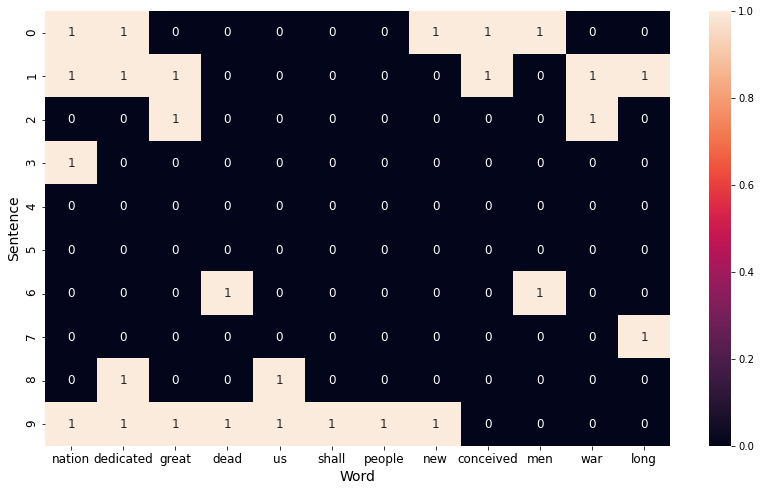

In [164]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(X, annot=True, annot_kws={"size": 12}, xticklabels=key_words)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Sentence', fontsize = 14)
plt.xlabel('Word', fontsize = 14)
plt.show()

In [7]:
# Convert a product categories to a matrix of token counts 
from sklearn import metrics
vectorizer = CountVectorizer()
y_test_counts = vectorizer.fit_transform(y_test)
features = vectorizer.get_feature_names()
# Get and print the model performance scores
print(metrics.classification_report(y_test, predicted, target_names=features))

                  precision    recall  f1-score   support

    bank_service       0.77      0.84      0.80      1307
     credit_card       0.73      0.78      0.75      1945
credit_reporting       0.84      0.84      0.84      5396
 debt_collection       0.83      0.77      0.80      3975
            loan       0.74      0.80      0.77      2089
 money_transfers       0.93      0.44      0.59       288

     avg / total       0.80      0.80      0.80     15000



In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(sublinear_tf=True, 
                       min_df=5, 
                       norm='l2', 
                       encoding='latin-1', 
                       ngram_range=(1, 3), 
                       stop_words='english',
                       lowercase=True,       
                       token_pattern=r'\b\w+\b',       
                       analyzer='word', 
                      )
features = tfidf.fit_transform(dataset)

In [65]:
features

<292x1 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [68]:
#Standard packages
import pandas as pd
import numpy as np
#import matplotlib
#from matplotlib import pyplot as plt

# Scikit Learn
from sklearn import preprocessing
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

#String
import string

import re
# Allow plots in Notebook
#%matplotlib inline

In [69]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [88]:
df = pd.read_csv("D:/Documents/Data/sim_case_study_data.csv")

In [89]:
df.head()

,category_id,metric_group,text
0,2815595,capability_strength,On check was debited from checking account and...
1,2217937,capability_strength,opened a Bank of the the West account The acco...
2,2657456,capability_strength,in nj opened a business account without author...
3,1414106,capability_strength,A hold was placed on saving account because in...
4,1999158,capability_strength,Dear CFPBneed to send a major concerncomplaint...


In [90]:
from io import StringIO
col = ['metric_group', 'text']
df = df[col]
df = df[pd.notnull(df['text'])]
df.columns = ['metric_group', 'text']
df['category_id'] = df['metric_group'].factorize()[0]
category_id_df = df[['metric_group', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'metric_group']].values)
df.head()

,metric_group,text,category_id
0,capability_strength,On check was debited from checking account and...,0
1,capability_strength,opened a Bank of the the West account The acco...,0
2,capability_strength,in nj opened a business account without author...,0
3,capability_strength,A hold was placed on saving account because in...,0
4,capability_strength,Dear CFPBneed to send a major concerncomplaint...,0


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(sublinear_tf=True, 
                       min_df=5, 
                       norm='l2', 
                       encoding='latin-1', 
                       ngram_range=(1, 3), 
                       stop_words='english',
                       lowercase=True,       
                       token_pattern=r'\b\w+\b',       
                       analyzer='word', 
                      )
features = tfidf.fit_transform(df.text)
labels = df.metric_group
features.shape

(4004, 12496)

In [92]:
from sklearn.model_selection import train_test_split

# 70-30 splitting the dataset (80%->Training and 20%->Validation)
X_train, X_test, y_train, y_test = train_test_split(features, labels
                                  ,test_size=0.3, random_state=1234)
features.shape, X_train.shape, X_test.shape

((4004, 12496), (2802, 12496), (1202, 12496))

In [93]:


# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB

# instantiating the model with Multinomial Naive Bayes..
model = MultinomialNB()

# training the model...
model = model.fit(X_train, y_train)



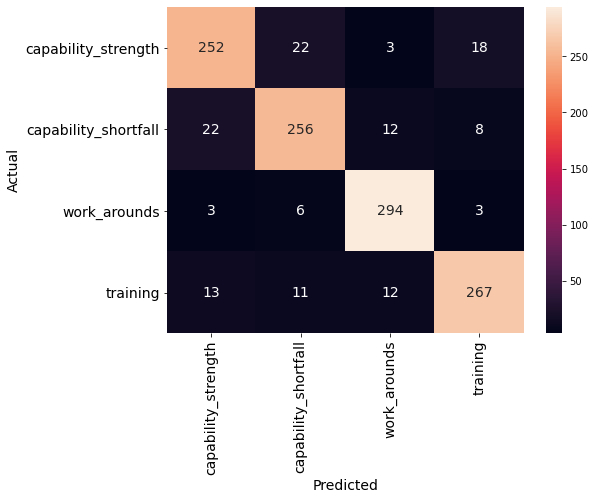

In [94]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 14}, fmt='d',
            xticklabels=category_id_df.metric_group.values, yticklabels=category_id_df.metric_group.values)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)
plt.show()